Trending YouTube Video Statistics Analysis Para Francia G02

Objetivo
Desarrollar una propuesta de análisis y analítica a partir de un conjunto de datos, aplicando lametodología CRISP-DM

LIMPIEZA DE DATOS

1. Los datos de cada país se encuentran en archivos individuales en formato CSV y la descripciónde sus categorías en un archivo de tipo JSON

2. Este conjunto de datos, ha sido modificado incorporándole cuatro nuevas columnas:

    • state

    • lat

    • lon

    • geometry

3. Se debe comprender el negocio y realizar la inspeccion de los datos, verificar su calidad, limpiar los datos y preprocesar los datos.

4. El dataset limpio estara dentro de la carpeta 'data' llamado 'clean_FR.csv'

PREGUNTAS A RESPONDER

POR CATEGORIA DE VIDEO
1. ¿Qué categorías de videos son las de mayor tendencia?
2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?
3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No megusta”?
4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /“Comentarios”?

POR EL TIEMPO TRANSCURRIDO

5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

POR CANALES DE YOUTUBE

6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

POR GEOGRAFIA DEL PAIS

7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

ADICIONALMENTE AL CLIENTE LE GUSTARIA CONOCER

8. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?
9. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

LIMPIEZA DE DATOS CODIGO

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
#Importar data

FR_df=pd.read_csv("FRvideos_cc50_202101.csv")

In [6]:
#Importar el json y extraer la data que nos interesa
import json
FR_category={}
with open("FR_category_id.json") as f:
    FR_data=json.load(f)
for i in list(pd.DataFrame(FR_data['items']).id.values):
    FR_category[i]=pd.DataFrame(FR_data['items'])[pd.DataFrame(FR_data['items']).id==i].snippet.values[0]['title']

In [7]:
#vemos la informacion de toda la informacion de las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [8]:
FR_df.sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
24120,p3sVtr95avg,18.17.03,4Keus - Je Pense (Clip Officiel),4KEUS Officiel,10,2018-03-16T16:58:13.000Z,"4Keus""|""Je""|""Pense""|""Clip""|""La""|""Vie""|""Continue""|""Mixtape""|""16 mars""|""album""|""Rap""|""O'Kartier C'est La Hess""|""Wati B""|""séparation""|""Djeffi""|""Tiakola""|""Bne""|""C'est Dieu Qui Donne""|""hors série",263896,23538,236,1593,https://i.ytimg.com/vi/p3sVtr95avg/default.jpg,False,False,False,4Keus - Je Pense (Clip Officiel)\n\nMixtape La Vie Continue disponible sur toutes les plateformes et dans les bacs : https://4Keus.lnk.to/LaVieContinueAW\n\nRéservez vos places pour un concert exclusif le 21 Avril à La Cigale :\nhttp://www.lacigale.fr/spectacle/4-keus/\n\n\nRéalisation : Basile M\n\nBOOKING : 4keusgvng@gmail.com\n\nInsta Tiakola : mundala_tiakola\nInsta Bne : bne4keus\nInsta Djeffi : djeffi_djingoss\n\n\nRéseaux Sociaux :\nFacebook : https://www.facebook.com/4KEUSGVNG/\nTwitter : https://twitter.com/4keus_officiel\nInstagram : https://www.instagram.com/4keus_officiel,Limousin,45.150408,1.533332,POINT (1.533332477 45.15040814)
20969,8j2VCcmL5zI,18.01.03,Fally Ipupa - Tout le monde danse (Clip officiel),Fally Ipupa,10,2018-02-28T16:00:18.000Z,"Fally Ipupa""|""Bad Boy""|""Musique""|""Afro""|""Clip officiel""|""fally ipupa""|""aya nakamura""|""eloko oyo""|""fally""|""fally ipupa eloko oyo""|""booba""|""bad boy""|""kiname""|""fally ipupa bad boy""|""fally eloko oyo""|""aya""|""fally ipupa 2016""|""fally ipupa 2017""|""fally ipupa amour assassin""|""fally ipupa nourrisson""|""fally ipupa service""|""fally ipupa original""|""eloko""|""fally ipupa anissa""|""eloko oyo fally ipupa""|""fally ipupa eloko oyo audio""|""booba kiname",169248,10280,243,1144,https://i.ytimg.com/vi/8j2VCcmL5zI/default.jpg,False,False,False,TOKOOOS le nouvel album de Fally Ipupa disponible partout: https://FallyIpupa.lnk.to/tokooosAY \n-\nAbonnez-vous à la chaine : http://po.st/FallyIpupa\n- \nRetrouvez Fally Ipupa sur :\nhttps://www.instagram.com/fallyipupa01 \nhttps://www.facebook.com/FallyIpupaOfficial \nhttps://twitter.com/fallyipupa01,Guadeloupe,16.241475,-61.532999,POINT (-61.5329989 16.24147504)
7128,0ZLbOuW-NuY,17.19.12,Thank You,Gorillaz,10,2017-12-18T11:53:29.000Z,"gorillaz""|""humanz""|""damon albarn""|""jamie hewlett""|""murdoc niccals""|""russel hobbs""|""noodle""|""2d""|""jaguar racing""|""sonos""|""saturnz barz""|""bigbabydram""|""kali uchis""|""peven everett""|""popcaan""|""gorillaz app""|""humanzhouseparty""|""spirit house""|""demon dayz""|""humanzworldtour""|""danny brown""|""vince staples""|""little simz""|""de la soul""|""pusha t""|""anthony hamilton""|""mistajam""|""gfoot""|""strobelite""|""jehnny beth",343876,64327,279,4590,https://i.ytimg.com/vi/0ZLbOuW-NuY/default.jpg,False,False,False,Thank you to all the Humanz who made it possible. Stay tuned for more in 2018 ✊\n\nhttp://www.gorillaz.com/tour\nhttp://www.instagram.com/gorillaz\nhttp://www.facebook.com/gorillaz\nhttp://www.twitter.com/gorillaz\n\nDownload the Gorillaz app at http://gorill.az/app \n\n✊,Nord Pas De Calais,50.283325,2.783334,POINT (2.783333698 50.28332481)


In [9]:
#valores nulos en cada columna
FR_df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

In [10]:
#Analizando  la media, moda,desv estandar, etc.
FR_df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40724.000000,4.072400e+04,4.072400e+04,4.072400e+04,4.072400e+04,40724.000000,40724.000000
mean,20.123809,4.199219e+05,1.738886e+04,8.149624e+02,1.832453e+03,36.986535,-2.314779
std,6.984422,1.772130e+06,8.720509e+04,1.139219e+04,1.404321e+04,19.889834,25.443453
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-21.033511,-61.532999
25%,17.000000,1.697450e+04,3.380000e+02,1.800000e+01,5.600000e+01,42.699989,-0.530030
50%,23.000000,7.372100e+04,1.892500e+03,8.300000e+01,2.350000e+02,45.899975,2.666648
75%,24.000000,2.708088e+05,7.969500e+03,3.350000e+02,8.410000e+02,48.516663,6.030009
max,44.000000,1.009116e+08,4.750254e+06,1.353661e+06,1.040912e+06,50.283325,55.712816


In [11]:

#analizando valores atipicos
columns_to_plot = ['category_id','views', 'likes', 'dislikes', 'comment_count','lat','lon']
Q1 = FR_df[columns_to_plot].quantile(0.25)
Q3 = FR_df[columns_to_plot].quantile(0.75)
IQR = Q3 - Q1

outliers = ((FR_df[columns_to_plot] < (Q1 - 1.5 * IQR)) | (FR_df[columns_to_plot] > (Q3 + 1.5 * IQR)))
outliers.sum()


category_id      2931
views            5163
likes            5695
dislikes         5174
comment_count    5078
lat              8671
lon              8671
dtype: int64

In [12]:
#Analizando los tipos de datos
FR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  int64  
 5   publish_time            40724 non-null  object 
 6   tags                    40724 non-null  object 
 7   views                   40724 non-null  int64  
 8   likes                   40724 non-null  int64  
 9   dislikes                40724 non-null  int64  
 10  comment_count           40724 non-null  int64  
 11  thumbnail_link          40724 non-null  object 
 12  comments_disabled       40724 non-null  bool   
 13  ratings_disabled        40724 non-null  bool   
 14  video_error_or_removed  40724 non-null

In [13]:
#Obtener la cantidad de filas duplicadas del dataframe
FR_df[FR_df.duplicated()].shape[0]

0

In [14]:
#Verificamos si los comentarios estan desabilitados para ciertos videos
FR_df["comments_disabled"].value_counts()

comments_disabled
False    39835
True       889
Name: count, dtype: int64

In [15]:
#Verificamos si los likes estan  desabilitados para ciertos videos
FR_df.ratings_disabled.value_counts()

ratings_disabled
False    40020
True       704
Name: count, dtype: int64

In [16]:
#Veremos si los videos tuvieron un error o han sido removidos 
FR_df.video_error_or_removed.value_counts()

video_error_or_removed
False    40702
True        22
Name: count, dtype: int64

Problemas Reportados 


1. El tipo de data de category_id debe ser objeto y no entero.

2. La tipo de dato de trending_date y publish_time deben ser datetime en ves de object.

3. Hay datos atipicos, sin embargo los que pueden afectar nuestros resultados son  views, likes, 
dislikes, comment_count, por lo que hay que aplicarles una tranformacion.

4. Hay columnas Inecesarias 'thumbnail_link','tags', 'description'

Consideraciones 

1. La unica columna con valores NA es description

2. No hay columnas duplicadas.

3. Hay videoos removidos, likes desabilitados y comentarios desabilitados, los cuales hay que tomar en consideracion al momento de realizar el analisis.

4. No hay datos vacios



DATA CLEANING


Creando el nuevo Dataset y eliminando las columnas innecesarias

In [17]:
#Crear el dataset de francia para realizar la limpieza
copy_FR=FR_df.copy()

In [18]:
#Eliminar columnas innecesarias
copy_FR.drop(['thumbnail_link','tags','description'],axis=1,inplace=True)


In [19]:
#Haciendo una prueba para ver si las columnas fueron eliminadas satisfactoriamente
for i in ['thumbnail_link','tags', 'description']:
    if i in copy_FR.columns:
        print("wrong")
  

Cambiar category id de int a object para que sea un categorico nominal y se nos facilite trabajar con futuras bibliotecas.

In [20]:
copy_FR['category_id'] = copy_FR['category_id'].astype(str)


In [21]:
#Verificamos si el cambio se realizo de manera correcta 
copy_FR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  object 
 5   publish_time            40724 non-null  object 
 6   views                   40724 non-null  int64  
 7   likes                   40724 non-null  int64  
 8   dislikes                40724 non-null  int64  
 9   comment_count           40724 non-null  int64  
 10  comments_disabled       40724 non-null  bool   
 11  ratings_disabled        40724 non-null  bool   
 12  video_error_or_removed  40724 non-null  bool   
 13  state                   40724 non-null  object 
 14  lat                     40724 non-null

Cambiando los tipos de datos de trending date y publish time al formato de Datetime


In [22]:
copy_FR['trending_date'] = pd.to_datetime(copy_FR['trending_date'], format='%y.%d.%m', errors='coerce')


In [23]:
copy_FR['year'] = copy_FR['trending_date'].dt.year
copy_FR['month'] = copy_FR['trending_date'].dt.month
copy_FR['day'] = copy_FR['trending_date'].dt.day


In [24]:
#Convertir la columna 'trending_date' date a datetime
copy_FR['trending_date'] = pd.to_datetime(copy_FR[['year', 'month', 'day']], errors='coerce')


In [25]:
# Convierte la columna 'publish_time' al formato de datetime
copy_FR['publish_time'] = pd.to_datetime(copy_FR['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')



In [26]:
#Verificamos el resultado de 'trending_date'
copy_FR.trending_date.sample(10)

14311   2018-01-26
39397   2018-06-08
23370   2018-03-13
16079   2018-02-04
25092   2018-03-21
18621   2018-02-17
17251   2018-02-10
39149   2018-06-06
40503   2018-06-13
29613   2018-04-19
Name: trending_date, dtype: datetime64[ns]

In [27]:
#verificamos el resultado de 'publish_time'
copy_FR.publish_time.sample(10)

24436   2018-03-17 07:37:48
967     2017-11-17 14:47:15
39114   2018-06-05 18:37:54
40346   2018-06-12 18:30:01
18375   2018-02-15 20:47:48
20754   2018-02-27 19:09:39
30750   2018-04-24 15:30:04
5813    2017-12-12 16:30:02
32617   2018-05-03 18:30:00
19260   2018-02-19 14:07:58
Name: publish_time, dtype: datetime64[ns]

Aplicando tranformacion logaritmica para evitar sesgos en las columnas de views, likes , dislikes y comment count.

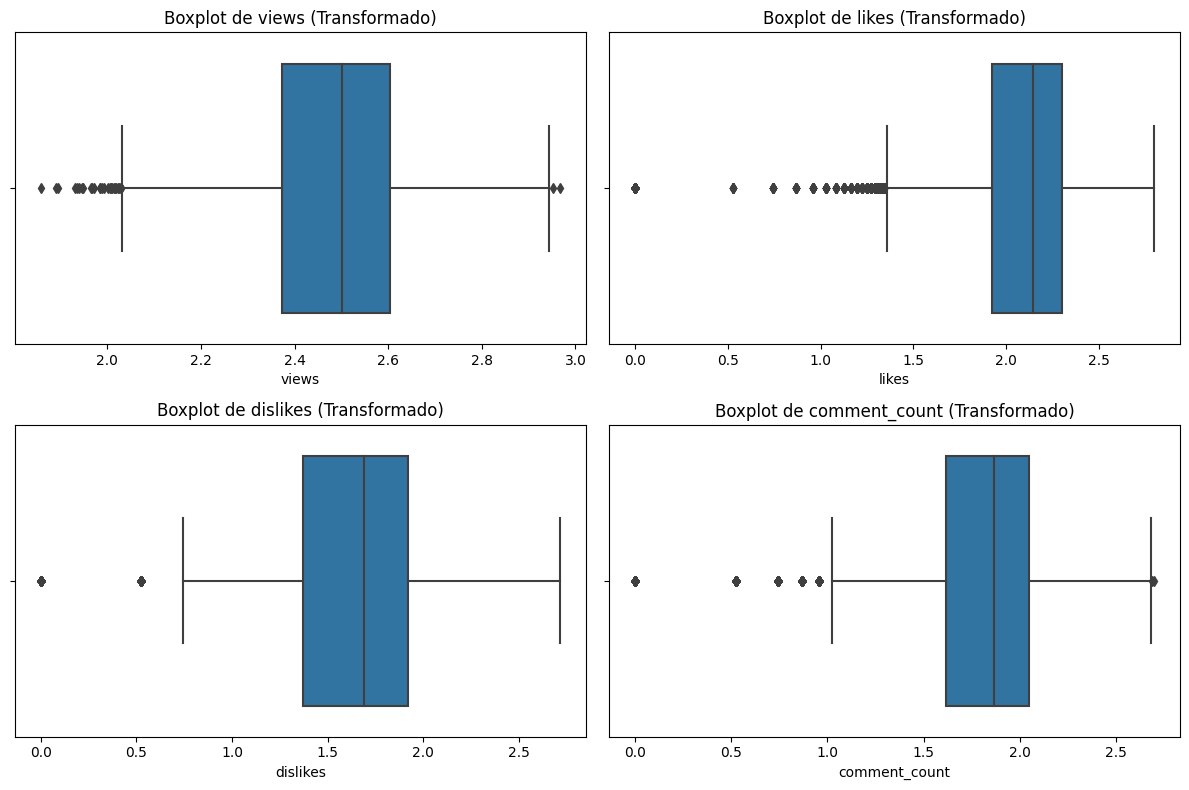

In [28]:
# Lista de columnas para aplicar la transformación logarítmica
columns_to_transform = ['views', 'likes', 'dislikes', 'comment_count']

# Aplicar logaritmo a las columnas seleccionadas
copy_FR[columns_to_transform] = np.log1p(copy_FR[columns_to_transform])

# Crea subgráficos para cada columna transformada
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_transform,start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=np.log1p(copy_FR[column]))  # Aplica la transformación logarítmica aquí
    plt.title(f'Boxplot de {column} (Transformado)')

plt.tight_layout()
plt.show()

In [29]:
#Hacemos una prueba para visualizar si se ha realizado de manera correcta.
columnas_interesantes = ['views', 'likes', 'dislikes', 'comment_count']

# Utiliza el método sample para obtener una muestra aleatoria
muestra_aleatoria = copy_FR[columnas_interesantes].sample(3)

# Imprime la muestra
print(muestra_aleatoria)




           views      likes  dislikes  comment_count
19851  10.091667   7.192934  5.655992       5.411646
23192  14.011751  10.882622  7.981050       8.520986
40373   9.617471   6.821107  2.484907       4.060443


Paso Final: Guardar la Data

In [30]:
#Guardar el archivo
copy_FR.reset_index(drop=True)
copy_FR.to_csv('clean_FR.csv')

In [31]:
#Cargar data
clean_FR=pd.read_csv('clean_FR.csv')
clean_FR.drop('Unnamed: 0', axis=1, inplace=True)
clean_FR.publish_time=clean_FR.publish_time.astype('datetime64[ns]') 
clean_FR.trending_date=clean_FR.trending_date.astype('datetime64[ns]') 

In [32]:
clean_FR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40724 non-null  object        
 1   trending_date           40724 non-null  datetime64[ns]
 2   title                   40724 non-null  object        
 3   channel_title           40724 non-null  object        
 4   category_id             40724 non-null  int64         
 5   publish_time            40724 non-null  datetime64[ns]
 6   views                   40724 non-null  float64       
 7   likes                   40724 non-null  float64       
 8   dislikes                40724 non-null  float64       
 9   comment_count           40724 non-null  float64       
 10  comments_disabled       40724 non-null  bool          
 11  ratings_disabled        40724 non-null  bool          
 12  video_error_or_removed  40724 non-null  bool  

In [33]:
id_to_title = {1: "Film & Animation", 2: "Autos & Vehicles", 10: "Music", 15: "Pets & Animals", 17: "Sports", 
               18: "Short Movies", 19: "Travel & Events", 20: "Gaming", 21: "Videoblogging", 22: "People & Blogs",
               23: "Comedy", 24: "Entertainment", 25: "News & Politics", 26: "Howto & Style", 27: "Education",
               28: "Science & Technology", 30: "Movies", 31: "Anime/Animation", 32: "Action/Adventure",
               33: "Classics", 34: "Comedy", 35: "Documentary", 36: "Drama", 37: "Family", 38: "Foreign",
               39: "Horror", 40: "Sci-Fi/Fantasy", 41: "Thriller", 42: "Shorts", 43: "Shows", 44: "Trailers"}

## Por categoría de videos

1. ¿Qué categorías de videos son las de mayor tendencia?



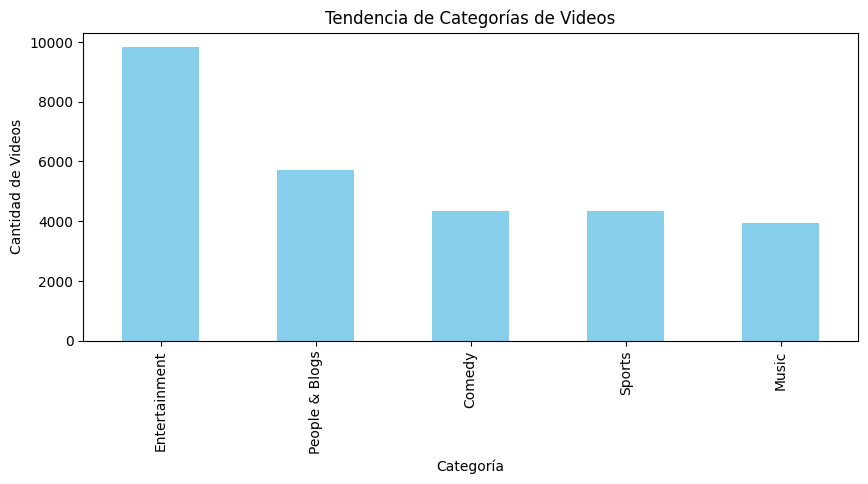

In [48]:
clean_FR['category_title'] = clean_FR['category_id'].map(id_to_title)

tendencia = clean_FR.groupby('category_title')['views'].count().sort_values(ascending=False).head()

plt.figure(figsize=(10, 4))
tendencia.plot(kind='bar', color='skyblue')
plt.title('Tendencia de Categorías de Videos')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Videos')
plt.show()

2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?


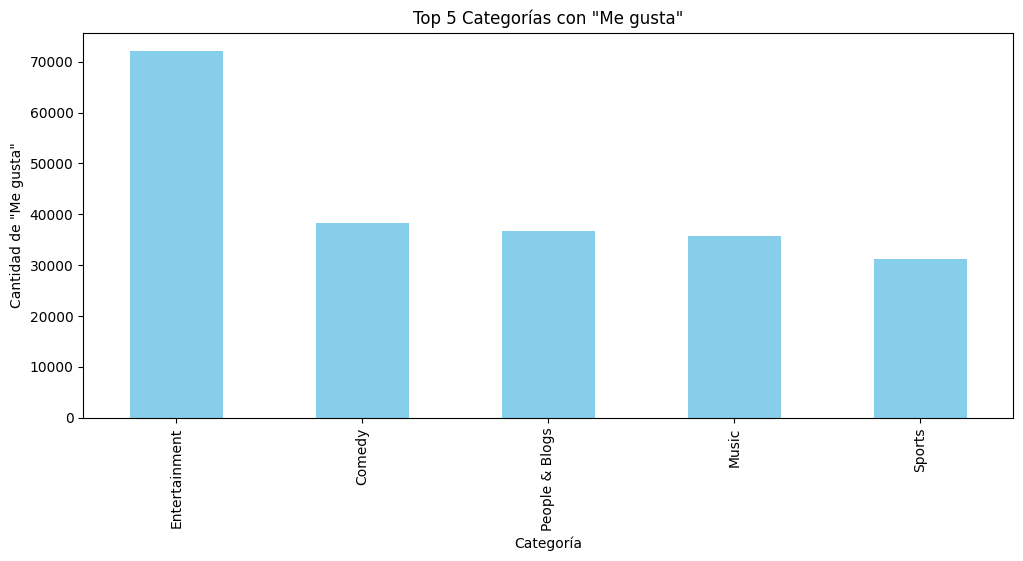

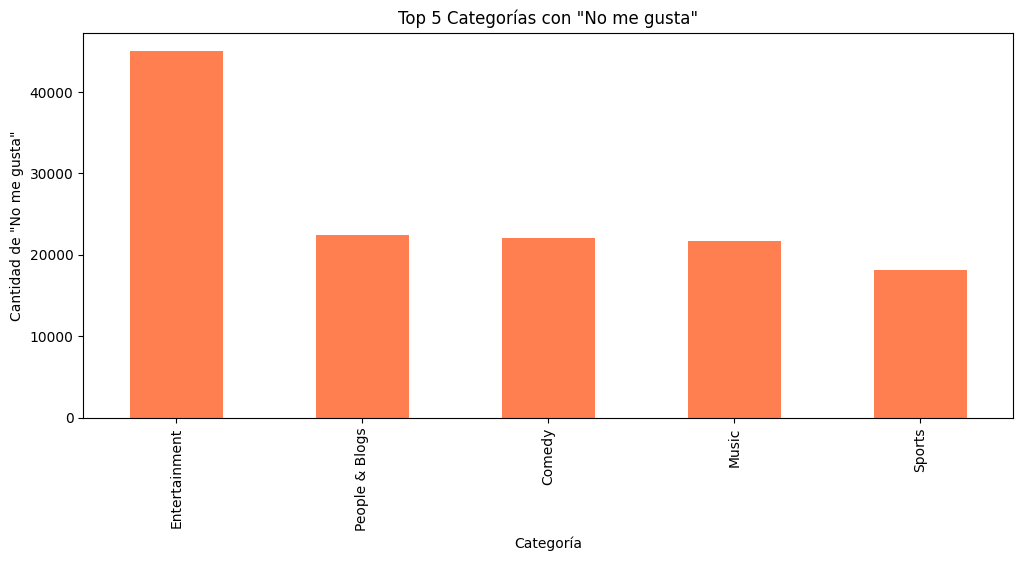

In [55]:
clean_FR['category_title'] = clean_FR['category_id'].map(id_to_title)

# Calcular la cantidad de 'Me gusta' por categoría.
gustan = clean_FR.groupby('category_title')['likes'].sum().sort_values(ascending=False).head()

plt.figure(figsize=(12, 5))
gustan.plot(kind='bar', color='skyblue')
plt.title('Top 5 Categorías con "Me gusta"')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de "Me gusta"')
plt.show()

disgustan = clean_FR.groupby('category_title')['dislikes'].sum().sort_values(ascending=False).head()

plt.figure(figsize=(12, 5))
disgustan.plot(kind='bar', color='coral')
plt.title('Top 5 Categorías con "No me gusta"')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de "No me gusta"')
plt.show()

3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No megusta”?


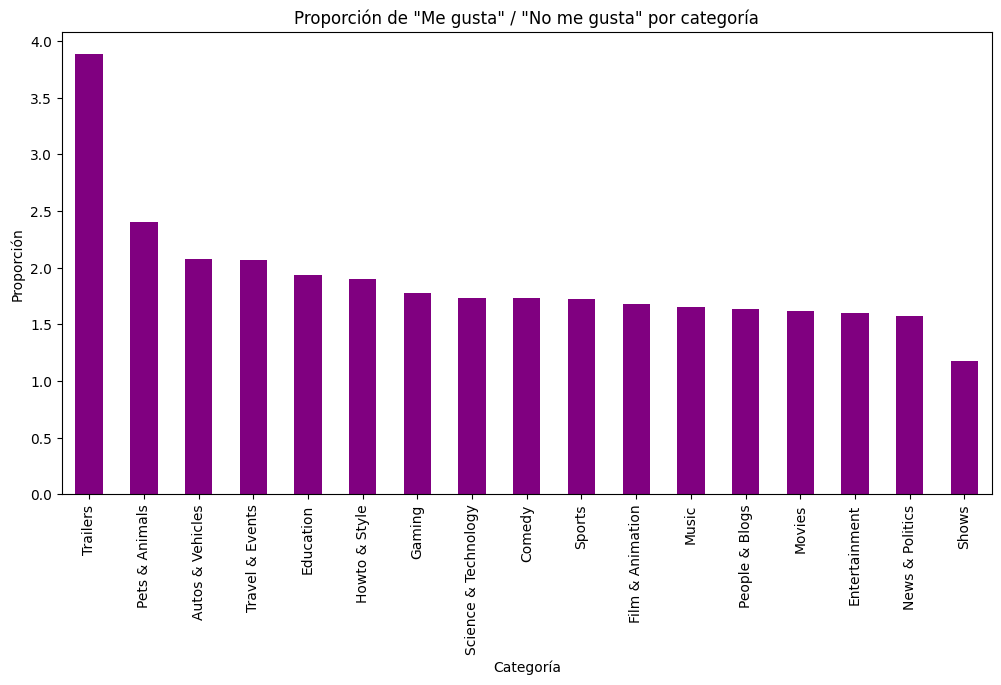

In [53]:
clean_FR['category_title'] = clean_FR['category_id'].map(id_to_title)

# Calcular la proporción de 'Me gusta' / 'No me gusta' por categoría.
proporciones = clean_FR.groupby('category_title')[['likes', 'dislikes']].sum()
proporciones['ratio'] = proporciones['likes'] / proporciones['dislikes']
proporciones = proporciones['ratio'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
proporciones.plot(kind='bar', color='purple')
plt.title('Proporción de "Me gusta" / "No me gusta" por categoría')
plt.xlabel('Categoría')
plt.ylabel('Proporción')
plt.show()

4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /“Comentarios”?

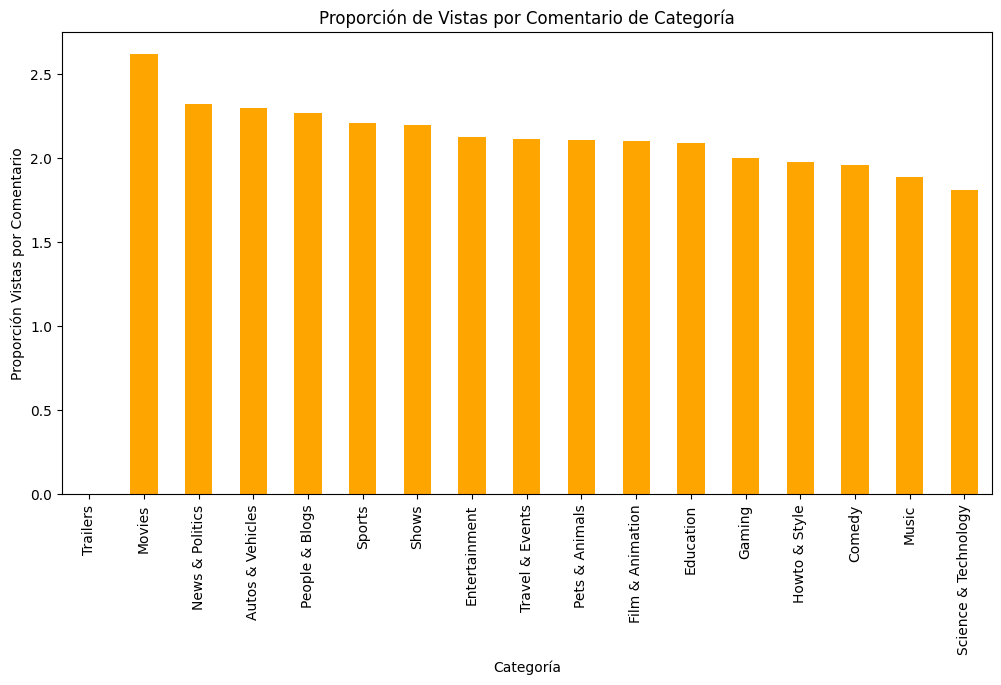

In [54]:
clean_FR['category_title'] = clean_FR['category_id'].map(id_to_title)

categorias_vistaxcomentario = clean_FR.groupby('category_title')[['views', 'comment_count']].sum()
categorias_vistaxcomentario['proporcion_views_comm'] = categorias_vistaxcomentario['views'] / categorias_vistaxcomentario['comment_count']

proporcion_sorted = categorias_vistaxcomentario['proporcion_views_comm'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
proporcion_sorted.plot(kind='bar', color='orange')
plt.title('Proporción de Vistas por Comentario de Categoría')
plt.xlabel('Categoría')
plt.ylabel('Proporción Vistas por Comentario')
plt.show()

## Por el tiempo transcurrido

5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?









Aquí, el DataFrame clean_FR se agrupa por la columna 'trending_date' utilizando el método groupby. Luego, el método size() se aplica para contar la cantidad de filas en cada grupo, es decir, la cantidad de videos en tendencia para cada fecha única. El resultado es una Serie de Pandas llamada videos_por_dia.

In [38]:
# Agrupación de datos por fecha
videos_por_dia = clean_FR.groupby('trending_date').size()

Se crea una figura de tamaño 12x6 pulgadas utilizando Matplotlib. Luego, se traza un gráfico de línea utilizando el método plot de la Serie videos_por_dia. El parámetro kind='line' especifica que queremos un gráfico de línea.

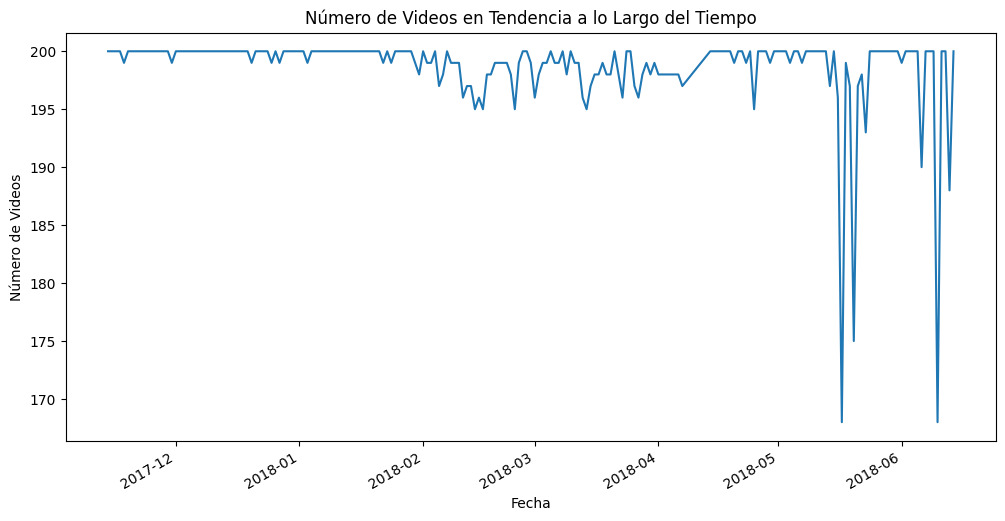

In [39]:
# Configuración de la figura y trazado del gráfico de línea
plt.figure(figsize=(12, 6))
videos_por_dia.plot(kind='line')

# Configuración de título y etiquetas de ejes
plt.title('Número de Videos en Tendencia a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Videos')

# Mostrar el gráfico
plt.show()

Este código realiza un análisis visual de la cantidad de videos en tendencia a lo largo del tiempo, utilizando un gráfico de línea para representar la tendencia. La figura resultante proporciona una representación visual clara de cómo ha evolucionado el volumen de videos en tendencia en el conjunto de datos.

## Por Canales de YouTube

6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?


Utilizamos el método value_counts() para contar la frecuencia de cada canal en la columna 'channel_title'. Esto creará una Serie que muestra cuántas veces cada canal ha aparecido en tendencia.

In [40]:
# Contar la frecuencia de cada canal en tendencia
canales_frecuencia = clean_FR['channel_title'].value_counts()

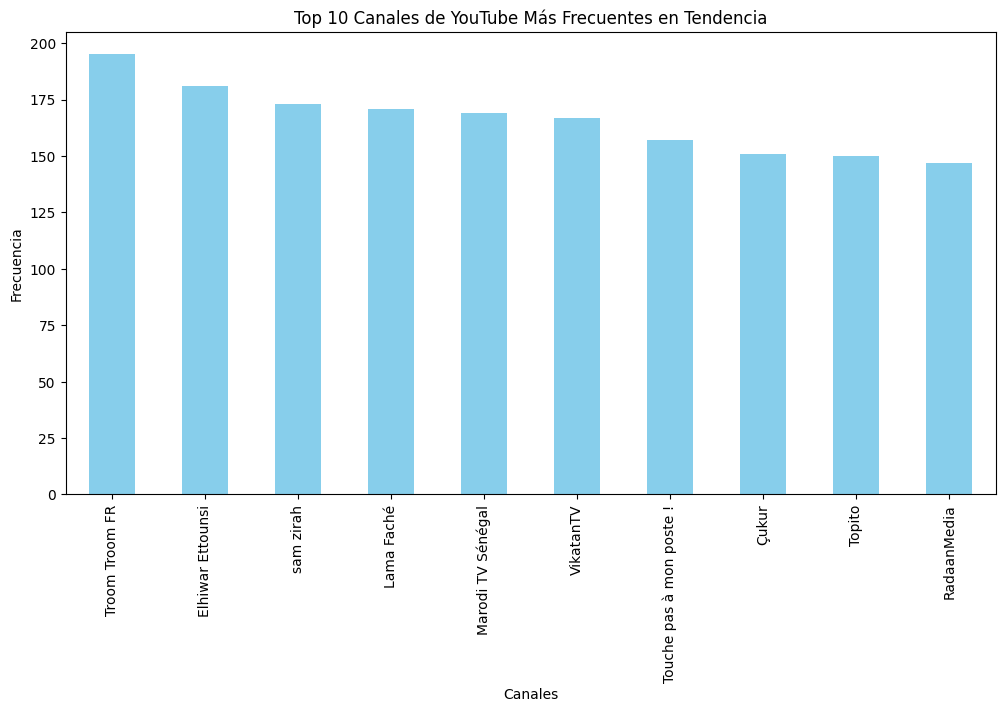

In [41]:
# Este código crea un gráfico de barras que muestra los 10 canales más frecuentes en tendencia.
plt.figure(figsize=(12, 6))
canales_frecuencia.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Canales de YouTube Más Frecuentes en Tendencia')
plt.xlabel('Canales')
plt.ylabel('Frecuencia')
plt.show()

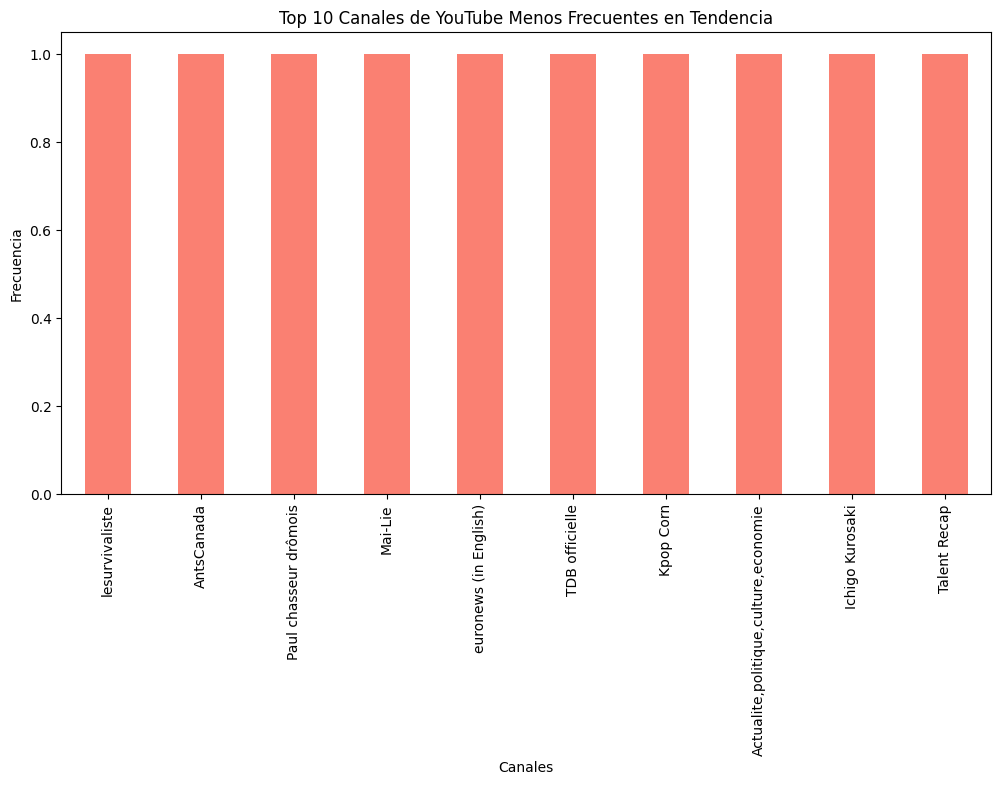

In [42]:
# Este código crea un gráfico de barras para mostrar los 10 canales menos frecuentes en tendencia.
plt.figure(figsize=(12, 6))
canales_frecuencia.tail(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Canales de YouTube Menos Frecuentes en Tendencia')
plt.xlabel('Canales')
plt.ylabel('Frecuencia')
plt.show()

## Por la geografía del país

7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?


In [43]:
# Agrupar por estado y calcular estadísticas:
estadisticas_por_estado = clean_FR.groupby('state').agg({
    'views': 'sum',
    'likes': 'sum',
    'dislikes': 'sum',
    'lat': 'mean',
    'lon': 'mean'
})

Agrupamos el DataFrame por la columna 'state' y se calcula la suma total de "Vistas", "Me gusta" y "No me gusta" para cada estado así como el promedio de su "latitud" y "longitud".

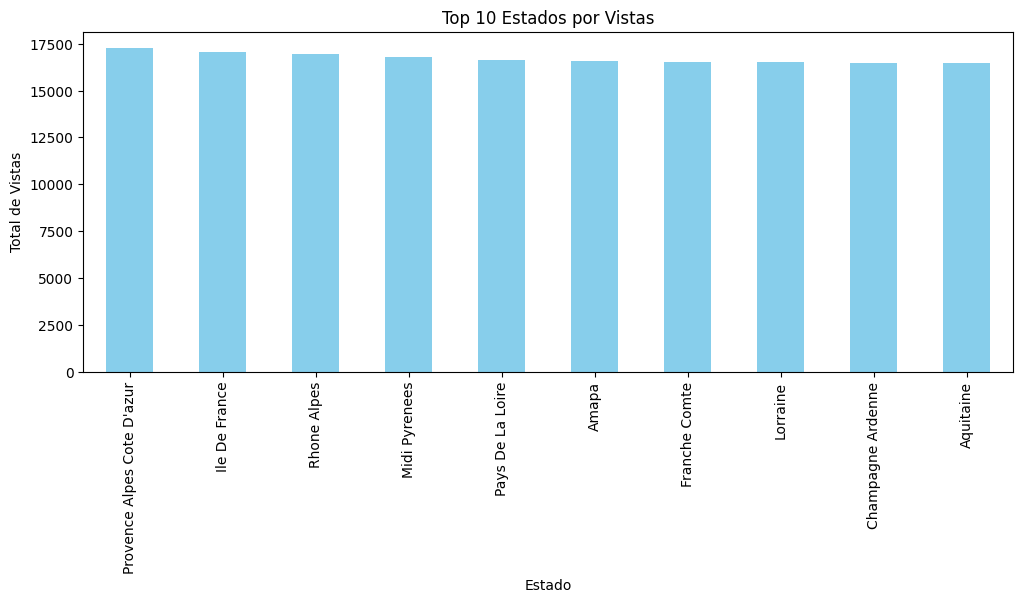

In [44]:
# Seleccionar los 10 estados con mayor cantidad de vistas
top_states_views = estadisticas_por_estado['views'].sort_values(ascending=False).head(10)

# Crear el gráfico de barras para vistas
plt.figure(figsize=(12, 15))
plt.subplot(3, 1, 1)
top_states_views.plot(kind='bar', color='skyblue')
plt.title('Top 10 Estados por Vistas')
plt.xlabel('Estado')
plt.ylabel('Total de Vistas')

# Ajustar el diseño y mostrar el gráfico
plt.show()

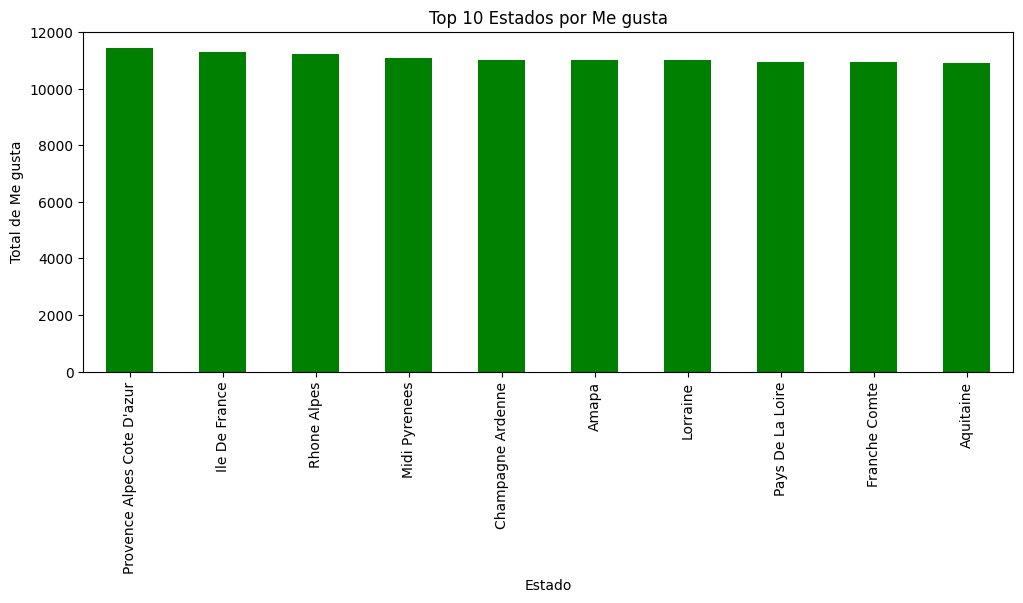

In [45]:
plt.figure(figsize=(12, 15))
# Seleccionar los 10 estados con mayor cantidad de Me gusta
top_states_likes = estadisticas_por_estado['likes'].sort_values(ascending=False).head(10)

# Crear el gráfico de barras para Me gusta
plt.subplot(3, 1, 2)
top_states_likes.plot(kind='bar', color='green')
plt.title('Top 10 Estados por Me gusta')
plt.xlabel('Estado')
plt.ylabel('Total de Me gusta')

plt.show()

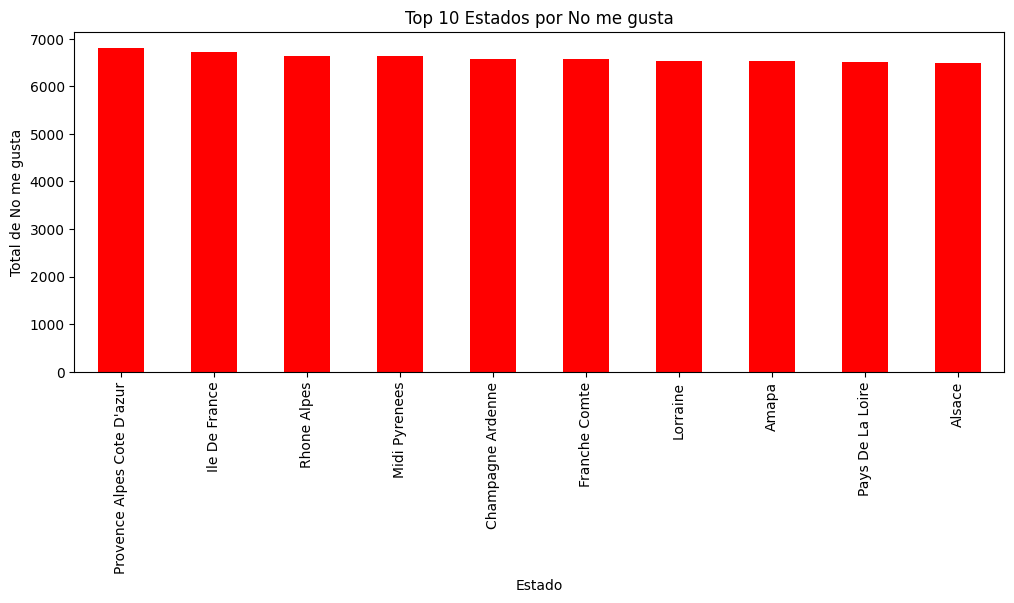

In [46]:
# Seleccionar los 10 estados con mayor cantidad de No me gusta
top_states_dislikes = estadisticas_por_estado['dislikes'].sort_values(ascending=False).head(10)

# Crear el gráfico de barras para No me gusta
plt.figure(figsize=(12, 15))
plt.subplot(3, 1, 3)
top_states_dislikes.plot(kind='bar', color='red')
plt.title('Top 10 Estados por No me gusta')
plt.xlabel('Estado')
plt.ylabel('Total de No me gusta')

plt.show()

Folium es una biblioteca de Python que se utiliza para visualizar datos geoespaciales de manera interactiva en mapas. Es especialmente útil cuando trabajas con conjuntos de datos que contienen información geográfica, como coordenadas de latitud y longitud. A continuación la instalaremos:

In [47]:
import folium

# Creamos un mapa centrado en Francia
mapa_estadisticas = folium.Map(location=[46.6031, 1.8883], zoom_start=6)

# Agregamos un marcador para cada estado con una ventana emergente que muestra estadísticas agregadas
for index, row in estadisticas_por_estado.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"State: {index}<br>Views: {row['views']}, Likes: {row['likes']}, Dislikes: {row['dislikes']}",
        icon=folium.Icon(color='blue')
    ).add_to(mapa_estadisticas)

# Mostramos el mapa
mapa_estadisticas.save('mapa_estadisticas.html')

ModuleNotFoundError: No module named 'folium'

## Adicionalmente, al cliente le gustaría conocer si:

8. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?


Regresión - Mean Squared Error: 0.7716882760103394
Regresión - R-squared: 0.7848313930639731


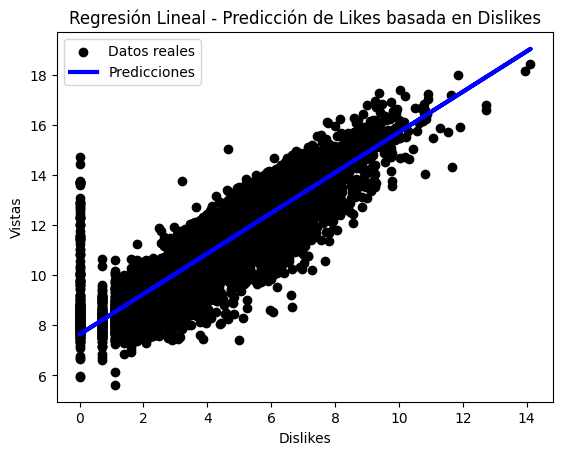

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecciona las características y la variable objetivo para regresión
X_reg = clean_FR[['dislikes']]
y_reg = clean_FR['views']

# Divide los datos en conjuntos de entrenamiento y prueba para regresión
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Realizar predicciones en el conjunto de prueba para regresión
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluar el rendimiento del modelo de regresión
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print(f'Regresión - Mean Squared Error: {mse_reg}')
print(f'Regresión - R-squared: {r2_reg}')

# Visualizar el ajuste del modelo con un gráfico de dispersión
plt.scatter(X_test_reg, y_test_reg, color='black', label='Datos reales')
plt.plot(X_test_reg, y_pred_reg, color='blue', linewidth=3, label='Predicciones')
plt.title('Regresión Lineal - Predicción de Likes basada en Dislikes')
plt.xlabel('Dislikes')
plt.ylabel('Vistas')
plt.legend()
plt.show()


9. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

Primero definiremos "comentarios positivos" usando una métrica personalizada que calculará la diferencia entre "me gusta" y "no me gusta" de cada video y se multiplicará el resultado por la cantidad de "comentarios" del video. De esta manera buscamos representar los "comentarios positivos" como el excedente de likes sobre dislikes y su cantidad de comentarios (entre mayor sea el resultado es porque el video tiene una mayor cantidad de comentarios positivos)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear una nueva columna para comentarios positivos
clean_FR['positive_comments'] = (clean_FR['likes'] - clean_FR['dislikes']) * clean_FR['comment_count']

# Definir las características y la variable objetivo para clasificación
X_clf = clean_FR[['likes', 'dislikes', 'comment_count']]
y_clf = clean_FR['positive_comments'] > 0  # Clasificar como positivo si positive_comments es mayor que 0

# Divide los datos en conjuntos de entrenamiento y prueba para clasificación
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
clf_model = LogisticRegression()
clf_model.fit(X_train_clf, y_train_clf)

# Realizar predicciones en el conjunto de prueba para clasificación
y_pred_clf = clf_model.predict(X_test_clf)

# Evaluar el rendimiento del modelo de clasificación
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)

print(f'Clasificación de Comentarios Positivos - Accuracy: {accuracy_clf}')

Clasificación de Comentarios Positivos - Accuracy: 0.9743400859422959


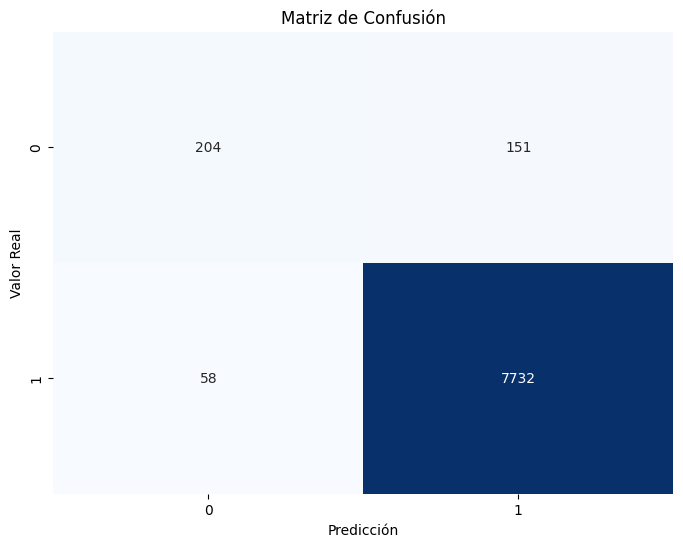

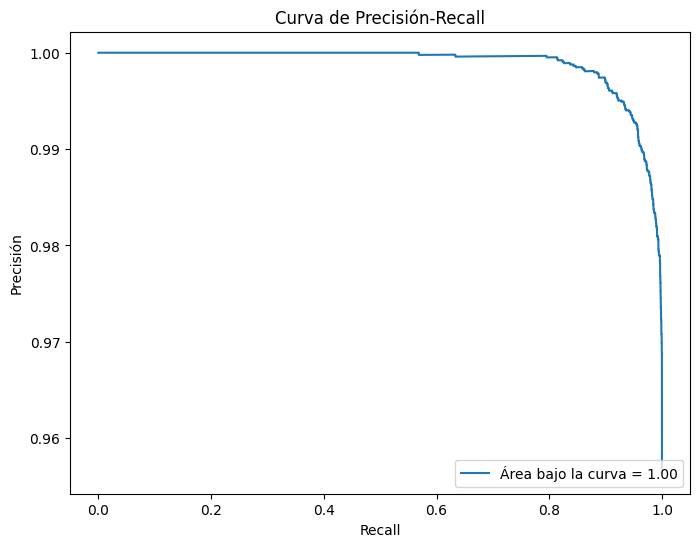

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_clf, y_pred_clf)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Calcular la curva de precisión y recall
precision, recall, _ = precision_recall_curve(y_test_clf, clf_model.predict_proba(X_test_clf)[:, 1])
area_under_curve = auc(recall, precision)

# Visualizar la curva de precisión y recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Área bajo la curva = {area_under_curve:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall')
plt.legend(loc='lower right')
plt.show()